# Ford GoBike System Data Analysis
## by ONWUEPE EMEKA

## Introduction
This is an analysis of of Ford GoBike data set which includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This analysis is more interested in discovring the bike demands; when,where and from who.

### Importing packages and loading the dataset

In [1]:
# let's import the necessary packages
import datetime
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
# let's load our dataset.
df = pd.read_csv('201902-fordgobike-tripdata.csv')

### Data Exploration

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.shape

(183412, 16)

In [6]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.nunique() 

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
df.member_birth_year.sort_values(ascending=True)

27370     1878.0
72711     1900.0
41319     1900.0
173711    1900.0
94616     1900.0
           ...  
183354       NaN
183356       NaN
183363       NaN
183371       NaN
183402       NaN
Name: member_birth_year, Length: 183412, dtype: float64

In [10]:
sum(df.duplicated())

0

## What is the structure of your dataset?

Our dataset consists on 183412 sample trips with 16 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip)

## Data Wrangling

### Quality Issues

1. Missing values in start_station_id start_station_name end_station_id end_station_name, member_birth_year and member_gender features
2. start_time and end_time are objects instead of DateTime data type
3. bike_id is int(numerical) instead of a string
4. start_station_id and end_station_id are float(numerical) instead of a string
5. member_birth_year is a float instead of int
6. member_birth_year of 1878 instead of 1978. None in the the dataset was born in 1800s

### Tidiness issues
1. start_station_latitude, start_station_longitude,end_station_latitude and end_station_longitude columns are variables for calculating distance.

### Feature Engeering
1. member_birth_year should be converted to actual member age
2. create a categorical age feature from age feature
3. transform duration_sec to duration_hr

In [11]:
# let's create a copy of our dataset before cleaning
df_clean = df.copy()

### Clean missing values
* Missing values in start_station_id, start_station_name, end_station_id and end_station_name.
These features have the same amount of missing values (197).

* Missing values in member_birth_year and member_gender features.
These features have the same amount of missing values (8265).

In [12]:
# let's query for rows where start_station_id, start_station_name,
# end_station_id and end_station_name are missing
df_clean.query('start_station_id.isna() & end_station_id.isna() & start_station_name.isna() & end_station_name.isna() ')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.5440,2019-02-02 12:27:12.2670,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.9690,2019-02-01 13:04:55.4260,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.6750,2019-02-01 12:28:37.0140,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.1470,2019-02-01 12:07:28.9400,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


We can see that the the four features are missing in the 197 rows. The best option is to drop them

In [13]:
# let's query for rows where member_birth_year and member_gender are missing
df_clean.query('member_birth_year.isna() & member_gender.isna()')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


We can see that the same set of people that didn't specify their birth year didn't specify their gender as well.</br>
We won't drop them. We will fill them in a way that they can be easily identified for further investigations

In [14]:
# filter out the missing rows in
# start_station_id, start_station_name,end_station_id and end_station_name
df_clean.query('start_station_id.notnull()',inplace=True)
# test
df_clean.query('start_station_id.isna() & end_station_id.isna() & start_station_name.isna() & end_station_name.isna() ')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


In [15]:
# let's fill the missing years with the year our dataset was collected
# This will group all them under the same unique age
df_clean.member_birth_year.fillna(2019,inplace=True)

# let's fill up missing gender with not specified
df_clean.member_gender.fillna("not specified",inplace=True)

In [16]:
# test
df_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Clean wrong member_birth_year of 1878

In [17]:
df_clean.member_birth_year = df_clean.member_birth_year.replace(1878.0,1978)
# test
df_clean.query('member_birth_year == 1878.0')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


### Clean wrong Data types

1. start_time and end_time are objects instead of DateTime data type
2. bike_id is int(numerical) instead of a string
3. start_station_id and end_station_id are float(numerical) instead of a string
4. member_birth_year is a float instead of int


In [18]:
# convert start_time and end_time to datetime
feature_list = ['start_time','end_time']
for feature in feature_list:
    df_clean[feature] = pd.to_datetime(df_clean[feature])
    
# convert bike_id to string
df_clean['bike_id'] = df_clean['bike_id'].astype('str')
    
# convert start_station_id, end_station_id to string
feature_list = ['bike_id','start_station_id','end_station_id']
for feature in feature_list:
    df_clean[feature] = df_clean[feature].astype('int').astype('str')

# convert member_birth_year to int
df_clean['member_birth_year'].astype('int')

# test
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  object        
 12  user_type       

### Calculate the distance covered per trip and drop start_station_latitude, start_station_longitude,end_station_latitude and end_station_longitude columns 

In [19]:
# vectorized haversine function
# Code gotten from https://stackoverflow.com/questions/40452759/
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    
    # multiply by Earth radius to get kilometers
    return earth_radius * 2 * np.arcsin(np.sqrt(a))


# calculate the distance per trip
df_clean['distance_km'] = haversine(df_clean.start_station_latitude, df_clean.start_station_longitude,
                    df_clean.end_station_latitude, df_clean.end_station_longitude)

# let's drop start_station_latitude, start_station_longitude,end_station_latitude and end_station_longitude columns
df_clean.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude','end_station_longitude'],axis=1,inplace=True)

# test
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance_km
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,0.544709
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,2019.0,not specified,No,1.742999
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,2.704545
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,1989.0,Other,No,0.260739
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,1974.0,Male,Yes,2.409301


### Feature Engeering
* member_birth_year should be converted to actual member age
* transform duration_sec to duration_hr
* create a categorical age feature from age feature

In [20]:
# convert member_birth_year to actual member age
df_clean.member_birth_year = (2019 - df_clean.member_birth_year.astype('int').values)
df_clean.rename({"member_birth_year":"member_age"},axis=1,inplace=True)

# convert duration_sec to duration_hr
df_clean.duration_sec = df_clean.duration_sec.apply(lambda x:x/3600 )
df_clean.rename({"duration_sec":"duration_hr"},axis=1,inplace=True)

Let's see the satistical age distribution of our dataset before we creating age groups/categories

In [21]:
# the birth_year values we filled with 2019 will have 0 age
# we don't need them to affect our stat
df_clean.query('member_age>0').describe()

,duration_hr,member_age,distance_km
count,174952.000000,174952.000000,174952.000000
mean,0.195556,34.196294,1.690049
std,0.456168,10.115522,1.096957
min,0.016944,18.000000,0.000000
25%,0.089722,27.000000,0.910443
50%,0.141667,32.000000,1.429829
75%,0.219167,39.000000,2.224010
max,23.485556,119.000000,69.469241


In [22]:
# create a categorical age feature from age feature
df_clean['age_group'] = pd.cut(df_clean['member_age'],bins=[-1,17,39,60,119],labels=["unidentified","Energetic(18-39)","Ageing(40-60)","Above 60"])

In [23]:
df_clean.head()

,duration_hr,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip,distance_km,age_group
0,14.495833,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,35,Male,No,0.544709,Energetic(18-39)
1,11.811389,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,81,Berry St at 4th St,2535,Customer,0,not specified,No,1.742999,unidentified
2,17.181667,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),5905,Customer,47,Male,No,2.704545,Ageing(40-60)
3,10.136111,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,70,Central Ave at Fell St,6638,Subscriber,30,Other,No,0.260739,Energetic(18-39)
4,0.440278,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,4898,Subscriber,45,Male,Yes,2.409301,Ageing(40-60)


#### Let's check the timeframe our dataset captured

In [24]:
print(f' start time min : {df.start_time.min()}, max {df.start_time.max()}' )
print(f' end time min : {df.end_time.min()}, max {df.end_time.max()}' )


 start time min : 2019-02-01 00:00:20.6360, max 2019-02-28 23:59:18.5480
 end time min : 2019-02-01 00:04:52.0580, max 2019-03-01 08:01:55.9750


It seems like our dataset covered from feb 1, to March 1,2019. The last/max date captured in the end_time is March 1.
Let's have a closer look

In [25]:
df_clean.query("end_time == end_time.max()")

,duration_hr,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip,distance_km,age_group
0,14.495833,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,35,Male,No,0.544709,Energetic(18-39)


We can now see that the end_time was for a bike that started on the last day of february. <br>
Thus, our dataset is february bike rides of Ford GoBike system  in 2019.


## What is/are the main feature(s) of interest in our dataset?

We are more interested in discovring the bike demands; when,where and from who the major demands are coming from? Trying to answer the question,when, will push us to time series analysis.


## What features in the dataset do you think will help support your investigation into your feature(s) of interest?

All features except start_station_id and end_station_id in cleaned dataframe features will be helpful

#### Helper Functions

In [26]:
def get_percentage(series):
    '''Takes in a series/list and returns the percentage
        of each element to the summation of the list/series elements'''
    
    return round((series/np.sum(series)) * 100,2)

def plot_graph(df,graph_type, title ,xlabel, ylabel, ylim):
    '''Takes in a datafrme and plots either bar or pie chart

        Paramenters
        df: Dataframe
        graph_type: str
        title: str
        xlabel: str
        ylabel: str
        ylim: boolean
    
    '''
    
    if graph_type == "bar":
        df.plot.bar(rot=0,width=0.8,edgecolor="black",color=[sns.color_palette()[0],'orange','green','yellow','gold'])
    elif graph_type == 'pie':
        df.plot.pie(subplots=True) 
        
    if ylim and graph_type != "pie" :
        plt.ylim(0,100)
        
    # Add title and format it
    plt.title(title.title(),
               fontsize = 14, weight = "bold")
    # Add x label and format it
    plt.xlabel(xlabel.title(),fontsize = 10, weight = "bold")
    # Add y label and format it
    plt.ylabel(ylabel.title(),
               fontsize = 10, weight = "bold")
    

def feature_uniques_percentage(feature_name,graph="bar",ylim= True,
                               cal_percentage = get_percentage,graph_fun = plot_graph,df=df):
    '''Takes in string feature_name and other optional arguments 
        and plots either bar or pie chart of the feature unique
        values percentages

        Paramenters
        feature_name: str
        graph: str -- optional -- default: bar
        ylim: boolean -- optional -- default: True
        cal_percentage: function -- optional -- default: global scope get_percentage function
        graph_fun: function -- optional -- default: global scope plot_graph function
        df: dataframe -- optional -- default: global scope df
    '''
    #  get the counts of the feature unique values
    feature_df = df[feature_name].value_counts().to_frame()
    
    #  prints feature counts
    index = feature_df.index
    print(f"{feature_name} Counts --- ",end=" ")
    for name in index:
        print(f'{name} : { feature_df.loc[name][feature_name]};',end=" ")
        
    #  changes unique values counts to percentage
    #  using the passed in percentage function: cal_percentage
    feature_df[feature_name] = cal_percentage(feature_df[feature_name])
    
    #  print out feature percentages
    print()
    print(f"{feature_name} percentage --- ",end=" ")
    for name in index:
        print(f'{name} : { feature_df.loc[name][feature_name]}%;',end=" ")
    

    title = f"unique values percentages of {feature_name} feature " 
    #   call the graph function
    graph_fun(feature_df,graph,title,feature_name,'Percentage',ylim)
    

## EDA

### Univariate Exploration

I will start by looking at the user_type distribution

user_type Counts ---  Subscriber : 163414; Customer : 19801; 
user_type percentage ---  Subscriber : 89.19%; Customer : 10.81%; 

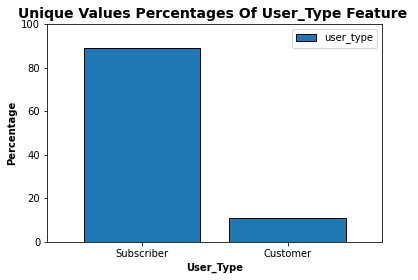

In [27]:
feature_uniques_percentage('user_type',df=df_clean)

It obvious that Ford GoBike had more demand from subscribers than customers in feb,2019

Next, let's look at the gender distribution

member_gender Counts ---  Male : 130500; Female : 40805; not specified : 8263; Other : 3647; 
member_gender percentage ---  Male : 71.23%; Female : 22.27%; not specified : 4.51%; Other : 1.99%; 

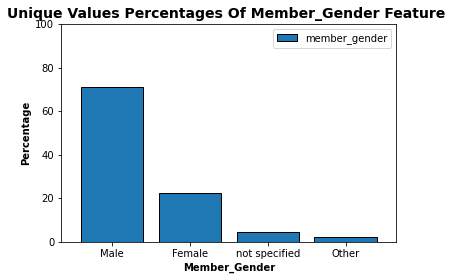

In [28]:
feature_uniques_percentage('member_gender',df=df_clean)

Ford GoBike demand within the month of feb,2019 was male dominated and it is interesting to note that 4.15% of the general demand could not be attributed to either male, female or other gender. The 4.15% represents those that their member_gender column were not filled

Next, let's look at the age_group distribution

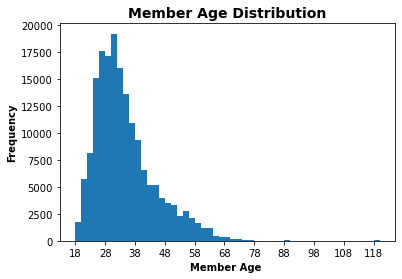

In [29]:
bin = np.arange(df_clean.query('member_age>0').member_age.min(),df_clean.member_age.max()+2,2);
ticks = np.arange(df_clean.query('member_age>0').member_age.min(),df_clean.member_age.max()+5,10);
df_clean.query('member_age>0').member_age.plot.hist(bins=bin);
plt.xticks(ticks)
plt.title("Member Age Distribution",
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Member Age ",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Frequency",
               fontsize = 10, weight = "bold");

age_group Counts ---  Energetic(18-39) : 134319; Ageing(40-60) : 37104; unidentified : 8263; Above 60 : 3529; 
age_group percentage ---  Energetic(18-39) : 73.31%; Ageing(40-60) : 20.25%; unidentified : 4.51%; Above 60 : 1.93%; 

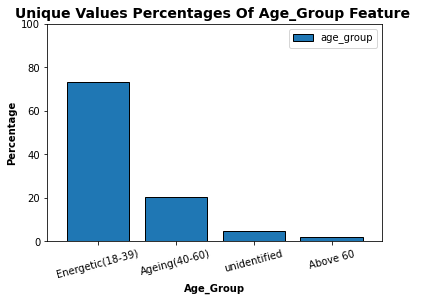

In [30]:
feature_uniques_percentage('age_group',df=df_clean)
plt.xticks(rotation=15);

Approximately 2% of our demands came from people above 60years and 94% from people below 60years with the higest percentage coming from those between the age of 18-39. The age group of about 5% of total demand is unknown, they represents those that their member_birth_year were not filled.

Next, let's look at the bike_share_for_all_trip feature distribution

bike_share_for_all_trip Counts ---  No : 165869; Yes : 17346; 
bike_share_for_all_trip percentage ---  No : 90.53%; Yes : 9.47%; 

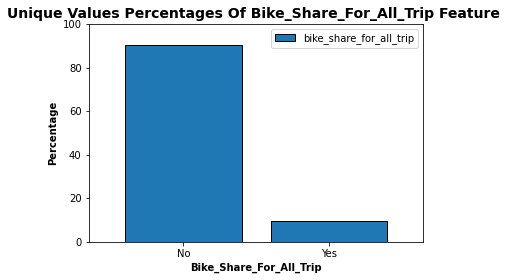

In [31]:
feature_uniques_percentage('bike_share_for_all_trip',df=df_clean)

90.53% of the users didn't share bike during their trips

Next, Let's look at the distance distribution graph

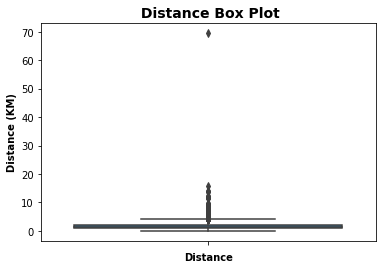

In [32]:
sns.boxplot(data=df_clean,y="distance_km");
plt.title(" Distance Box Plot",
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Distance",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Distance (KM)",
               fontsize = 10, weight = "bold");

We have an extreme value/outlier around 70km

In [33]:
df_clean.query('distance_km>60')

,duration_hr,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_age,member_gender,bike_share_for_all_trip,distance_km,age_group
112038,1.929167,2019-02-12 14:28:44.402,2019-02-12 16:24:30.158,21,Montgomery St BART Station (Market St at 2nd St),300,Palm St at Willow St,4780,Subscriber,34,Female,No,69.469241,Energetic(18-39)


In [34]:
# drop the extreme value
df_clean.query('distance_km<60',inplace=True) 

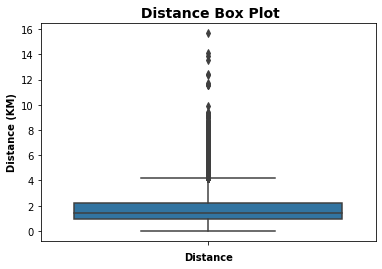

In [35]:
# let's plot again
sns.boxplot(data=df_clean,y="distance_km");
plt.title(" Distance Box Plot",
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Distance",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Distance (KM)",
               fontsize = 10, weight = "bold");

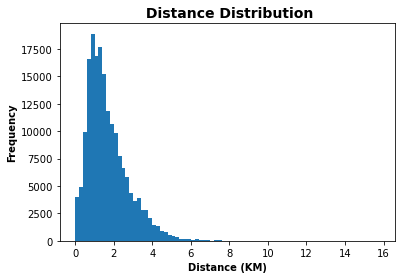

In [36]:
bin = np.arange(df_clean.distance_km.min(),df_clean.distance_km.max()+0.2,0.2);
ticks = np.arange(df_clean.distance_km.min(),df_clean.distance_km.max()+0.5,2);
# plt.figure(figsize = [16, 5])
df_clean.distance_km.plot.hist(bins=bin);
plt.xticks(ticks)
plt.title(" Distance Distribution",
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Distance (KM)",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Frequency",
               fontsize = 10, weight = "bold");
# plt.xticks(rotation=15);

Distance feature is unimodal but right skewed 

Next, Let's look at the duration_hr distribution graph

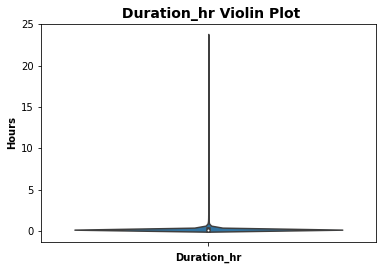

In [37]:
sns.violinplot(data=df_clean,y="duration_hr");
plt.title(" Duration_hr Violin Plot",
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Duration_hr",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Hours",
               fontsize = 10, weight = "bold");

Both the IQR, low and high are not very seperated. The feature has an abnormal distribution

Next, Let's see stations that generate top demands

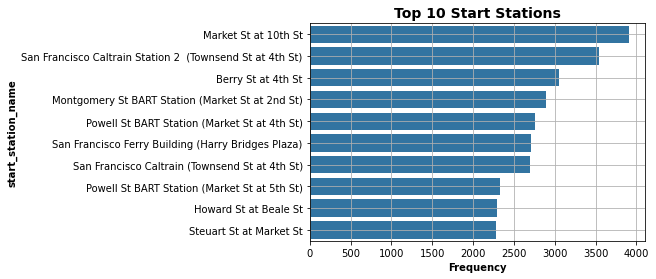

In [38]:
start_station = df_clean.groupby("start_station_name").size().sort_values(ascending=False).head(10)
start_station = start_station.reset_index()
start_station.rename({0:"frequency"},axis=1,inplace=True)
sns.barplot(y="start_station_name",x="frequency",data=start_station,color=sns.color_palette()[0]);
plt.title("Top 10 Start Stations",
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Frequency",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("start_station_name",
               fontsize = 10, weight = "bold");
plt.grid();

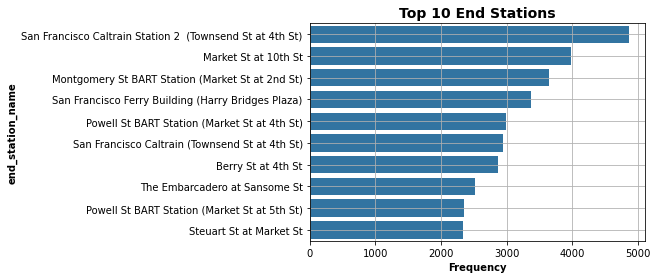

In [39]:
end_station = df_clean.groupby("end_station_name").size().sort_values(ascending=False).head(10)
end_station = end_station.reset_index()
end_station.rename({0:"frequency"},axis=1,inplace=True)
sns.barplot(y="end_station_name",x="frequency",data=end_station,color=sns.color_palette()[0]);
plt.title("Top 10 End Stations",
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Frequency",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("end_station_name",
               fontsize = 10, weight = "bold");
plt.grid();

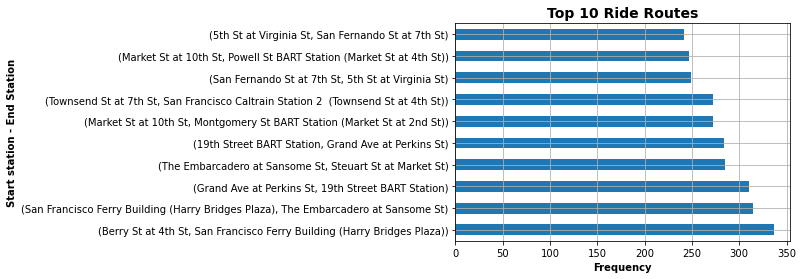

In [40]:
routes = df_clean.groupby(["start_station_name",'end_station_name']).size().sort_values(ascending=False)
routes.head(10).plot.barh()
plt.title("Top 10 Ride Routes",
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Frequency",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Start station - End Station",
               fontsize = 10, weight = "bold");
plt.grid()

In [41]:
routes.head(20)

start_station_name                                  end_station_name                                         
Berry St at 4th St                                  San Francisco Ferry Building (Harry Bridges Plaza)           337
San Francisco Ferry Building (Harry Bridges Plaza)  The Embarcadero at Sansome St                                314
Grand Ave at Perkins St                             19th Street BART Station                                     310
The Embarcadero at Sansome St                       Steuart St at Market St                                      285
19th Street BART Station                            Grand Ave at Perkins St                                      284
Market St at 10th St                                Montgomery St BART Station (Market St at 2nd St)             272
Townsend St at 7th St                               San Francisco Caltrain Station 2  (Townsend St at 4th St)    272
San Fernando St at 7th St                           5th St at Virginia 

(Market St at 10th St) generated the highest start trip while (San Francisco Caltrain Station 2 (Townsend St at 4th St)) generated the highest end trip. <br><br> We can argue that large chunks of those that left from (Market St at 10th St) which is the highest start station headed towards (Montgomery St BART Station (Market St at 2nd St)), (Powell St BART Station (Market St at 4th St)) and (San Francisco Caltrain Station 2 (Townsend St at 4th St)) stations and that was why they all made it to the list of top travelled routes.<br><br> The high number of arrivals at (San Francisco Caltrain Station 2 (Townsend St at 4th St)) were mostly riders from (Townsend St at 7th St), (Market St at 10th St) and (Division St at Potrero Ave)<br><br>
One might at first be tempted to conclude that (Market St at 10th St) - (San Francisco Caltrain Station 2 (Townsend St at 4th St)) would be the most travelled route but that's wrong though it made it to top eleven. The most travelled route from our dataset is (Berry St at 4th St) - (San Francisco Ferry Building (Harry Bridges Plaza)). What makes it more interesting is that (Berry St at 4th St) is the third highest start strip station while (San Francisco Ferry Building (Harry Bridges Plaza)) is the fourth highest end trip station. <br><br> 



Next, let's see the top stations that users with missing gender abd birth_year petronised

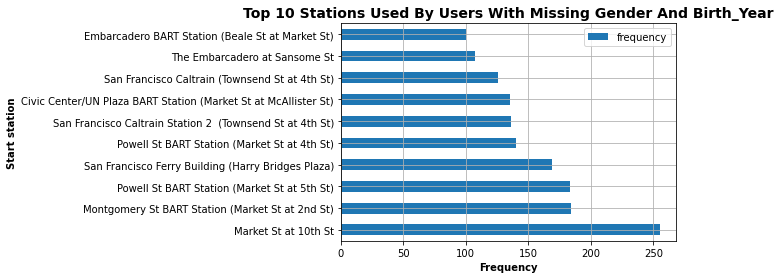

In [42]:
data = df_clean.groupby(["start_station_name",'member_gender']).size().sort_values(ascending=False).reset_index()
data = data.query("member_gender=='not specified'")
data.rename({0:"frequency"},axis=1,inplace=True)
data.query('frequency>0').head(10).plot.barh(x="start_station_name",y="frequency");
plt.title("Top 10 Stations Used by Users with Missing Gender and Birth_year".title(),
               fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Frequency",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Start station",
               fontsize = 10, weight = "bold");
plt.grid()

We must have been familiar with most of the stations that showed up. They are the stations with top demands. We can argue that the ommissions might be due to rush to attend to high demands  

### Variable/features distributions and outliers

distance_km and age are unimodel distributions though right skewed While duration_hr has an abnormal distribution, both the IQR, low and high are not very seperated.
<br>
All of the above mentioned features had outliers but only the one extreme data point in distance_km was droppped 

In [43]:
# let's save the cleaned dataframe
df_clean.to_csv('cleaned_201902-fordgobike-tripdata.csv',index=False)

## Bivariate Exploration

Let's compare the top 10 start station with the top 10 end station

                                                    start_count  end_count
station                                                                   
Market St at 10th St                                     3904.0     3973.0
San Francisco Caltrain Station 2  (Townsend St ...       3544.0     4857.0
Berry St at 4th St                                       3052.0     2872.0
Montgomery St BART Station (Market St at 2nd St)         2894.0     3647.0
Powell St BART Station (Market St at 4th St)             2760.0     2997.0
San Francisco Ferry Building (Harry Bridges Plaza)       2710.0     3368.0
San Francisco Caltrain (Townsend St at 4th St)           2703.0     2947.0
Powell St BART Station (Market St at 5th St)             2327.0     2353.0
Howard St at Beale St                                    2293.0        NaN
Steuart St at Market St                                  2283.0     2338.0
The Embarcadero at Sansome St                               NaN     2512.0


<Figure size 360x1152 with 0 Axes>

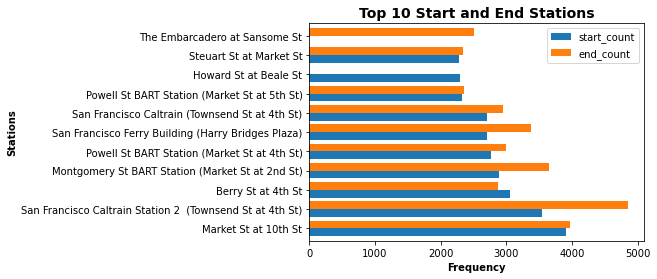

In [44]:
end_station.rename({"frequency":"end_count",'end_station_name':"station"},axis=1,inplace=True);
start_station.rename({"frequency":"start_count",'start_station_name':"station"},axis=1,inplace=True);
merged = start_station.merge(end_station,left_on="station",right_on="station",how='outer');
merged = merged.set_index("station");

plt.figure(figsize = [5, 16]);
merged.plot(y=['start_count','end_count'], kind="barh",width=0.8);
plt.title("Top 10 Start and End Stations",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Frequency",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Stations",
               fontsize = 10, weight = "bold");
print(merged)


(The Embarcadero at Sansome St) made it to the top 10 end_station but not among the top 10 start_station. We can argue that people moved in more than they moved out of the location in feb,2019 and majority of those that moved in came from (San Francisco Ferry Building (Harry Bridges Plaza)). Remember (San Francisco Ferry Building (Harry Bridges Plaza)) - (The Embarcadero at Sansome St) is the second most travelled route.<br><br>  (Howard St at Beale St) made it to the top 10 start stations but didn't make it to top 10 end stations. This shows that people moved out more than they moved in of the location in feb,2019 <br><br> All but (Berry St at 4th St) that made it to both top 10 start and end station had more people coming in than moving out.

Next, let's look at the pairwise correlations present between features in the data

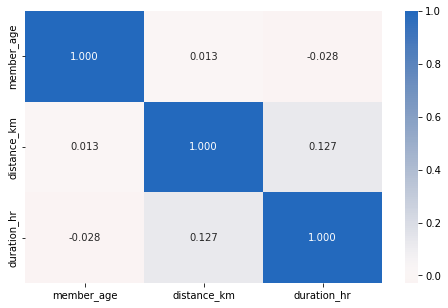

In [45]:
numeric_vars = ['member_age', 'distance_km', 'duration_hr']
# categoric_vars = ['cut', 'color', 'clarity']

# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);




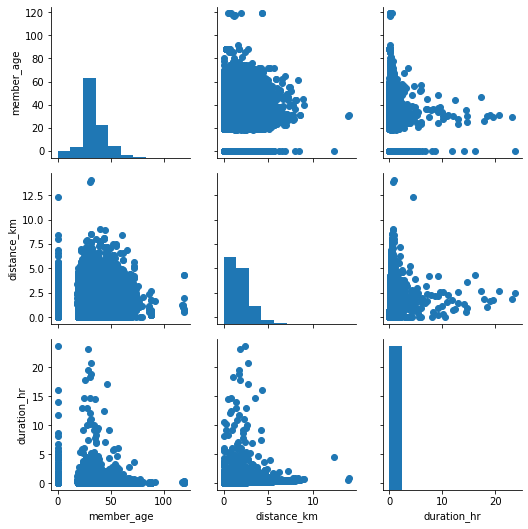

In [46]:

# plot matrix: sample rides carried out by 600 bikes so that plots are clearer and
# they render faster
bike_ids = df_clean["bike_id"].unique()[:600]
data = df_clean.query("bike_id in @bike_ids")


g = sns.PairGrid(data = data, vars = numeric_vars);
g = g.map_diag(plt.hist, bins = 10);
g.map_offdiag(plt.scatter);

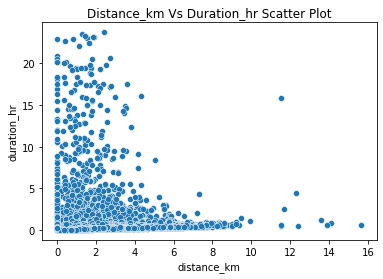

In [47]:
sns.scatterplot(data=df_clean,x="distance_km",y="duration_hr");
plt.title("Distance_km Vs Duration_hr Scatter Plot");

We can only see a very weak positive correlation between duration_hr and distance_km

Next, we are aware that most of the users are within the age of 18-39 and majority of our users are subscribers but we don't know if how the subscribers are spread across the different age group. Let's take a closer look on the two features.

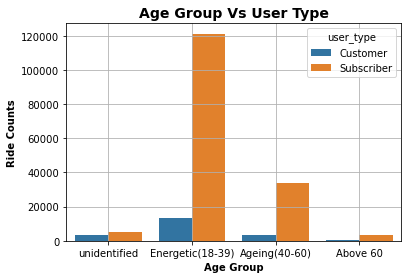

In [48]:
sns.countplot(data=df_clean, x="age_group", hue="user_type");
plt.grid()
plt.title("Age Group Vs User Type",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Age Group",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Ride Counts",
               fontsize = 10, weight = "bold");

We can conclude that the energetic(18-39) which is the age group with the higest bike rides (trips) is mostly made up of subscribers.

Next, let's see how gender groups are spread across the various age groups

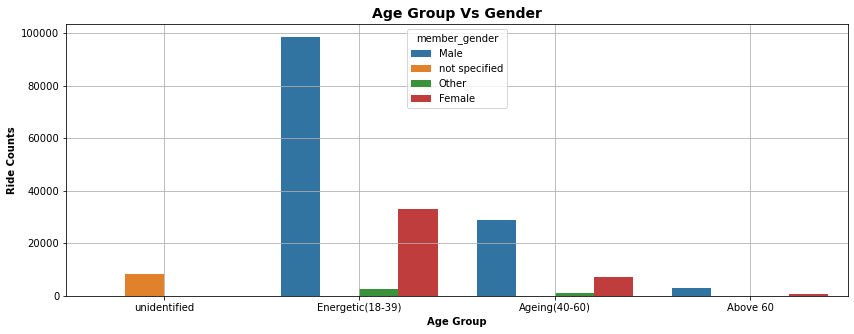

In [49]:
plt.figure(figsize = [14, 5])
sns.countplot(data=df_clean, x="age_group", hue="member_gender");
plt.grid()
plt.title("Age Group Vs Gender",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Age Group",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Ride Counts",
               fontsize = 10, weight = "bold");

We can see that majority of the male riders are within the 18-39years, the energetic followed by the aging 40-60 years and there are no female and other above 60

Next, Let's look at age group that travelled alone the most

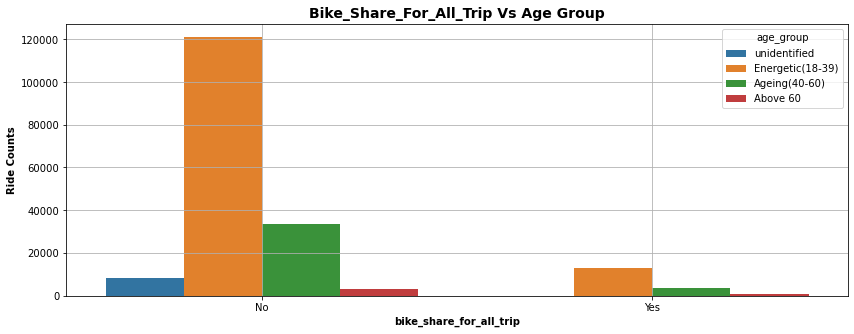

In [50]:
plt.figure(figsize = [14, 5])
sns.countplot(data=df_clean, x="bike_share_for_all_trip", hue="age_group",);
plt.grid()
plt.title("Bike_Share_For_All_Trip Vs Age Group",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("bike_share_for_all_trip",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Ride Counts",
               fontsize = 10, weight = "bold");

We might be tempted to conclude that the energetic travelled alone the most yet they also shared bikes the most. The unidentified did not appear on the side of those that didn't travelled alone. Thus, we can conclude that they are the set of people that travelled alone the most

Next, Let's look at user group/type that travelled alone the most

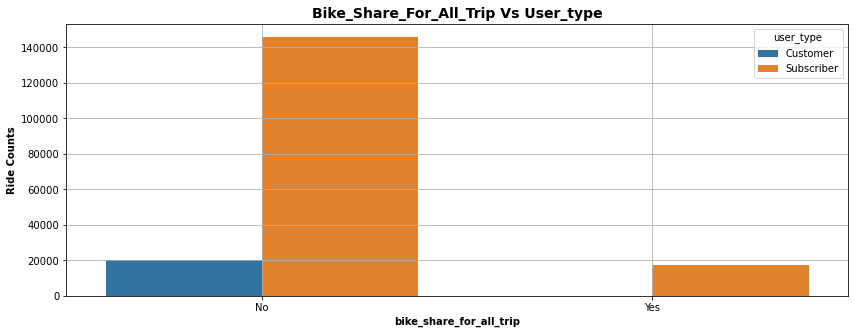

In [51]:
plt.figure(figsize = [14, 5])
sns.countplot(data=df_clean, x="bike_share_for_all_trip", hue="user_type",);
plt.grid()
plt.title("Bike_Share_For_All_Trip Vs User_type",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("bike_share_for_all_trip",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Ride Counts",
               fontsize = 10, weight = "bold");

Customers always travelled alone

Next let's look at the distance each age_group covered, how far each group could travel. 

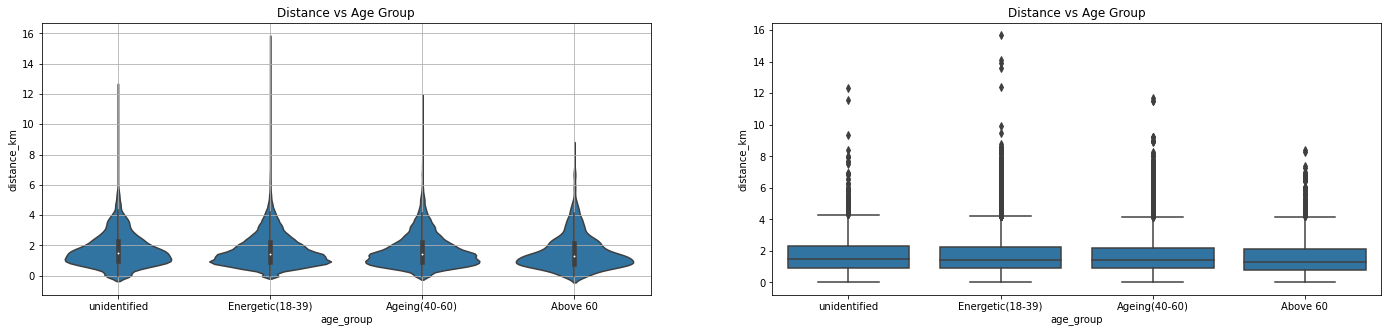

In [52]:
plt.figure(figsize = [24, 5])
base_color = sns.color_palette()[0]


plt.subplot(1, 2, 1)
plt.title("Distance vs Age Group")
ax1 = sns.violinplot(data=df_clean, x='age_group', y='distance_km', color=base_color );
plt.grid()

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
plt.title("Distance vs Age Group")
sns.boxplot(data=df_clean, x='age_group', y='distance_km', color=base_color);

On average all age group travels almost the same distance though the tendency to travel more distance decreases as age increases. This is obvious from the violin whisker heights. One can argue that since all the age groups travels within the same routes that the distance is expected to remain constant. 

Next let's look at the distance each user_type covered, how far each group could travel. 

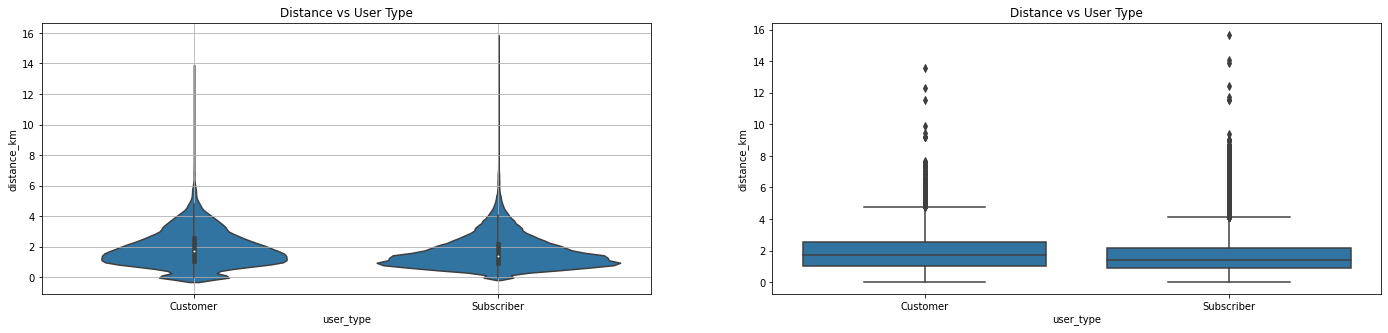

In [53]:
plt.figure(figsize = [24, 5])
base_color = sns.color_palette()[0]


plt.subplot(1, 2, 1)
plt.title("Distance vs User Type")
ax1 = sns.violinplot(data=df_clean, x='user_type', y='distance_km', color=base_color );
plt.grid()

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
plt.title("Distance vs User Type")
sns.boxplot(data=df_clean, x='user_type', y='distance_km', color=base_color);


Subscribers clearly have more data points and are more likely to travel far distance. 

Next let's look at the distance each gender covered, how far each group could travel. 

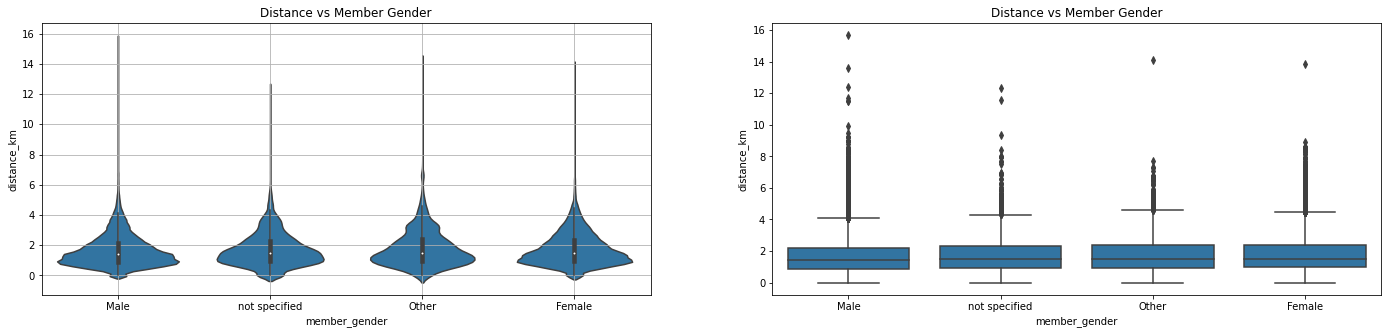

In [54]:
plt.figure(figsize = [24, 5])
base_color = sns.color_palette()[0]


plt.subplot(1, 2, 1)
plt.title("Distance vs Member Gender")
ax1 = sns.violinplot(data=df_clean, x='member_gender', y='distance_km', color=base_color );
plt.grid()

# RIGHT plot: box plot
plt.subplot(1, 2, 2)
plt.title("Distance vs Member Gender")
sns.boxplot(data=df_clean, x='member_gender', y='distance_km', color=base_color);

They share the same IQR though Males are more likely to go on a long distance journey

Next let's look at ten most used bikes with and how each gender made use of them

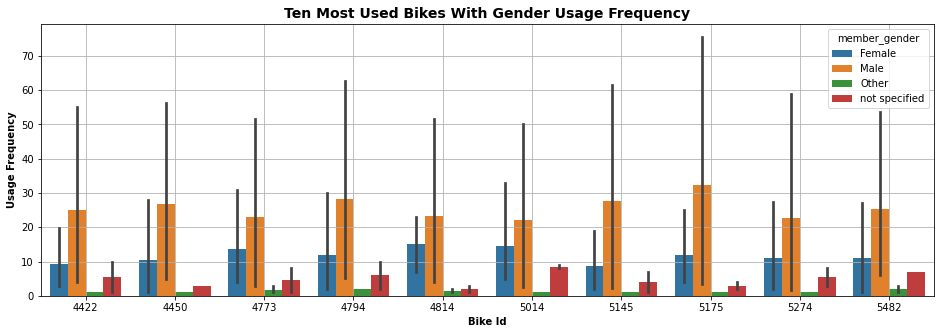

In [55]:
bikes_usage_ids = df_clean.groupby(['bike_id'],as_index=False).size().sort_values(by="size",ascending=False)['bike_id']
top_10 = bikes_usage_ids[0:10]
bikes_usage_df = df_clean.groupby(['bike_id','user_type','member_gender','age_group'],as_index=False).size()
top_10_data = bikes_usage_df.query('bike_id in @top_10 & size>0')

# plt.figure(figsize = [16, 5])

# plt.subplot(1, 2, 1)
#Let's return the axes object
fig,ax= plt.subplots(figsize = [16, 5])
sns.barplot(data=top_10_data, x="bike_id", y="size",hue='member_gender',ax=ax);
# plt.xticks(rotation=30);
plt.grid()
# # RIGHT plot: box plot
# plt.subplot(1, 2, 2)

plt.title("Ten Most Used Bikes With Gender Usage Frequency",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Bike Id",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Usage Frequency",
               fontsize = 10, weight = "bold");


It is obvious that men made the most use of these bikes, though we don't have enough information to know why these bikes were preferred by users even those that their birth_year and gender were missing also made use of these bikes.

Next let's look at ten most used bikes with and how each user_type made use of them

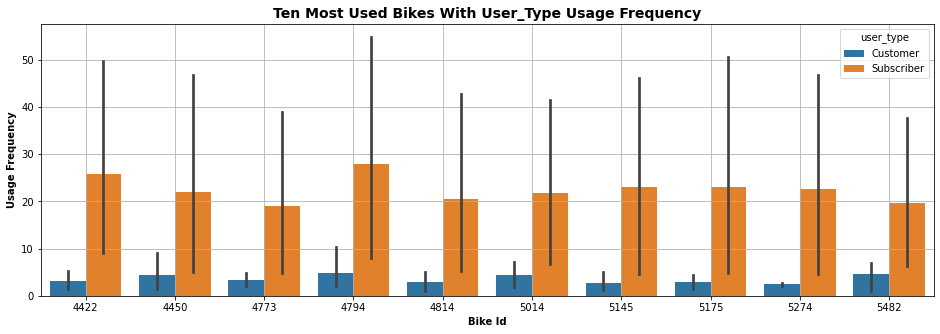

In [56]:
fig,ax= plt.subplots(figsize = [16, 5])
sns.barplot(data=top_10_data, x="bike_id", y="size",hue='user_type',ax=ax);
plt.grid()
plt.title("Ten Most Used Bikes With User_Type Usage Frequency",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Bike Id",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Usage Frequency",
               fontsize = 10, weight = "bold");

Subscribers made most use of these bikes

Next let's look at ten most used bikes with and how each age group made use of them

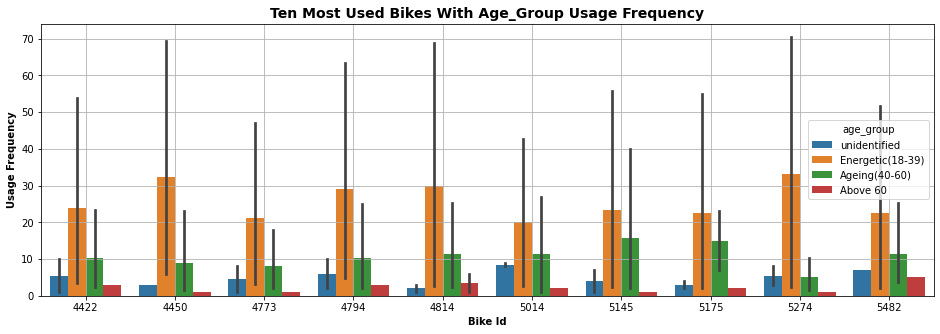

In [57]:
fig,ax= plt.subplots(figsize = [16, 5])
sns.barplot(data=top_10_data, x="bike_id", y="size",hue='age_group',ax=ax);
plt.grid()
plt.title("Ten Most Used Bikes With Age_Group Usage Frequency",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Bike Id",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Usage Frequency",
               fontsize = 10, weight = "bold");

The Energetic(18-39) followed by the ageing(40-60) made most use of these bikes

Next, let's look at our data time series. Let's know which day and time of the day that has high trip rates

In [58]:
data_sum = df_clean.groupby(df_clean.start_time.dt.dayofweek)['distance_km','duration_hr'].sum()
data_mean = df_clean.groupby(df_clean.start_time.dt.dayofweek)['distance_km','duration_hr'].mean()
data_count = df_clean.groupby(df_clean.start_time.dt.dayofweek)['distance_km'].count()
distance_df = df_clean.groupby(df_clean.start_time.dt.hour)['distance_km'].sum()


C:\Users\23481\AppData\Local\Temp\ipykernel_19992\2897611167.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_sum = df_clean.groupby(df_clean.start_time.dt.dayofweek)['distance_km','duration_hr'].sum()
C:\Users\23481\AppData\Local\Temp\ipykernel_19992\2897611167.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_mean = df_clean.groupby(df_clean.start_time.dt.dayofweek)['distance_km','duration_hr'].mean()


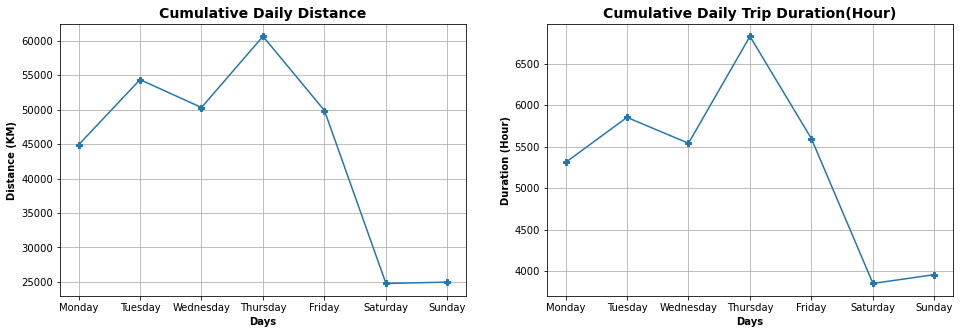

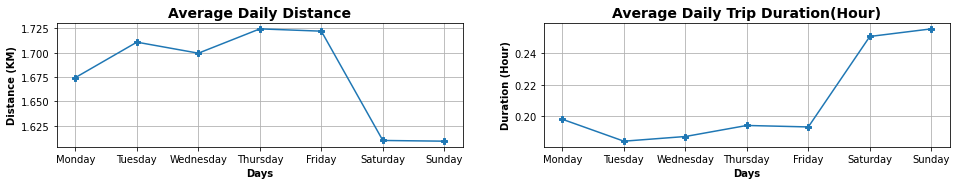

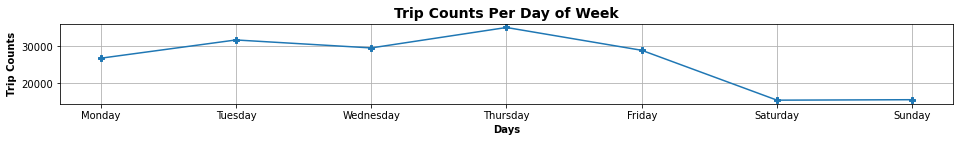

In [59]:
plt.figure(figsize = [16,5])
base_color = sns.color_palette()[0]
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


plt.subplot(1, 2, 1)
data_sum.distance_km.plot(marker="P");
plt.xticks([0,1,2,3,4,5,6,],labels=labels);
plt.title("Cumulative Daily Distance",fontsize = 14, weight = "bold");
# Add x label and format i
plt.xlabel("Days",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Distance (KM)",
               fontsize = 10, weight = "bold");
plt.grid();


plt.subplot(1, 2, 2)
data_sum.duration_hr.plot(marker="P");
plt.xticks([0,1,2,3,4,5,6,],labels=labels);
plt.title("Cumulative Daily Trip Duration(Hour)",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Days",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Duration (Hour)",
               fontsize = 10, weight = "bold");
plt.grid();


plt.figure(figsize = [16, 5])
plt.subplot(2, 2, 1)
data_mean.distance_km.plot(marker="P");
plt.xticks([0,1,2,3,4,5,6,],labels=labels);
plt.title("Average Daily Distance",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Days",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Distance (KM)",
               fontsize = 10, weight = "bold");
plt.grid();

plt.subplot(2, 2, 2)
data_mean.duration_hr.plot(marker="P");
plt.xticks([0,1,2,3,4,5,6,],labels=labels);
plt.title("Average Daily Trip Duration(Hour)",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Days",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Duration (Hour)",
               fontsize = 10, weight = "bold");
plt.grid();

plt.figure(figsize = [16, 5])
plt.subplot(3, 1, 2)
data_count.plot(marker="P");
plt.xticks([0,1,2,3,4,5,6,],labels=labels);
plt.title("Trip Counts Per Day of Week",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Days",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Trip Counts",
               fontsize = 10, weight = "bold");
plt.grid();


We can argue that more trips occured from Tuesday to Friday with Thursday as the highest. The average daily trip duration graph might look confusing at first but a look at the trip counts graph shows that Monday, Saturday and Sunday had the lowest trip counts. That's why they had high average durations

Next, let's see the busiest time of the day

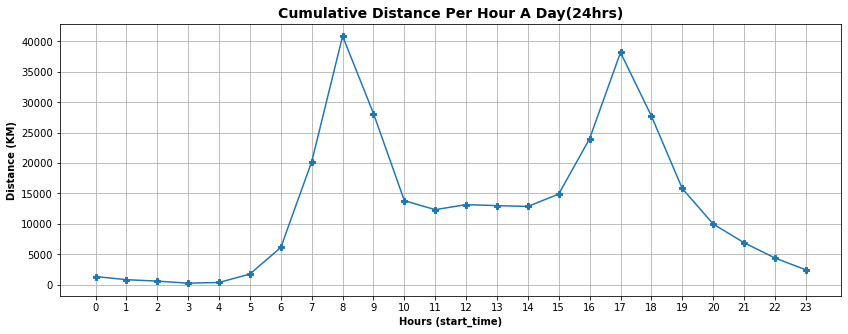

In [60]:
distance_df = distance_df.reset_index()
plt.figure(figsize = [14, 5])
distance_df.distance_km.plot(marker="P");
plt.xticks(distance_df.start_time)
plt.grid()
plt.title("Cumulative Distance Per Hour A Day(24hrs)",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Hours (start_time)",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Distance (KM)",
               fontsize = 10, weight = "bold");

We can see a gradual raise in the graph as early as 4am reaching it's first peak by 8am. If we should place a line at 15000KM, we will see clearly the busiest hours are 7am - 9am and 4pm - 7pm. Bearing in mind that the majority of the users are within the age of 18-39 and 40-60 which could be called the working/business class, one could argue that the busiest hours are actually the time they should be going to work/ventures (7am - 9am) and when they should be returning home (4pm - 7pm)

Next, let's look at the overall progress of the Bikeshare business in the month of february. We will calculate this using the distance covered per day. We will assume the distance covered per distance positively correlate to the ammount/price per trip.

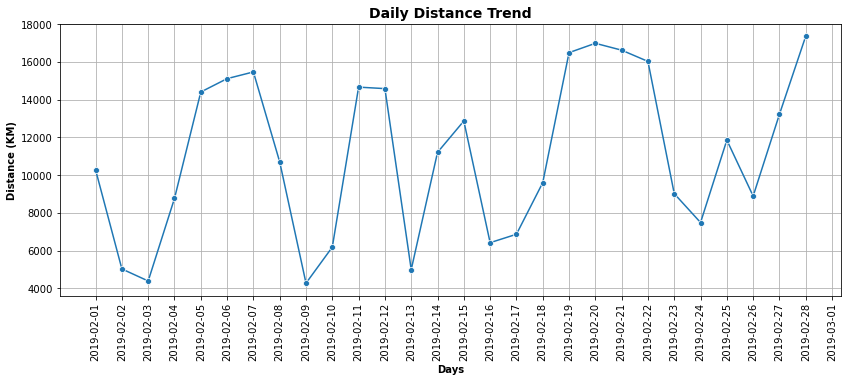

In [61]:
data =df_clean.resample('1d', on="start_time",)['distance_km'].sum()
data = data.reset_index()
plt.figure(figsize = [14, 5])
sns.lineplot(data=data,x="start_time",y='distance_km',marker="o")


base = datetime.datetime(2019, 2, 1)
arr = np.array([base + datetime.timedelta(days=i) for i in range(29)])

plt.xticks(arr,rotation=90);
plt.grid()

plt.title("Daily Distance Trend",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Days",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Distance (KM)",
               fontsize = 10, weight = "bold");

The first Week, 4 - 10 (first Monday - Sunday) did better than the second week (11-17). We can argue that there was a drawback in the second week making the week 1 high the resistance level. The resistance was broken on the third week (18-24) making it the new resistance level till it got broken on Thursday 28 feb. Generally, our chart started making higher lows and relatively higher highs as from feb 9, which denotes an uptrend. Thus, the business made progress in the month of feb, 2019.


### Some of the relationships observed in this part of the investigation

> Contrary to the initial weak correlation observed between distancce_km and duration_hr, reshape the them under time series reveals that they are actually positively correlated. <br>
> The missing data in birth_year and gender came from stations with high demands. Thus, we can argue that the omissions might be due to rush to attend to high demands 

## Multivariate Exploration

Next, let's see the speed(distance_km vs duration_hr) of each age group. 

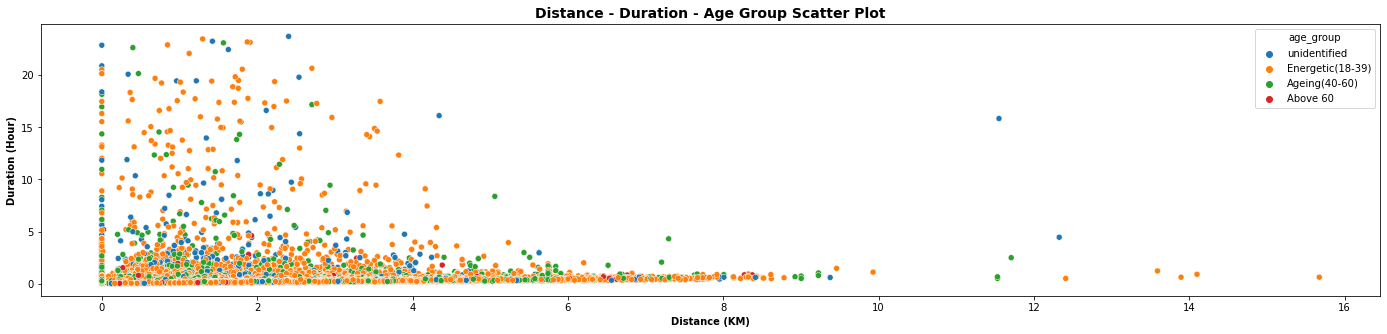

In [62]:
plt.figure(figsize = [24, 5])
sns.scatterplot(data=df_clean,x='distance_km',y="duration_hr",hue='age_group');
plt.title("Distance - Duration - Age Group Scatter Plot",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Distance (KM)",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Duration (Hour)",
               fontsize = 10, weight = "bold");

There are no obvious patterns; the energetics are capable to travelling a long distance faster (within a short time) yet we can see points that indicates that they can also take longer time to travel a short distance. We can argue that the ageing(40-60) are less likely to embark on long distance rides. 

Next, let's see the speed(distance_km vs duration_hr) of each user_type. 

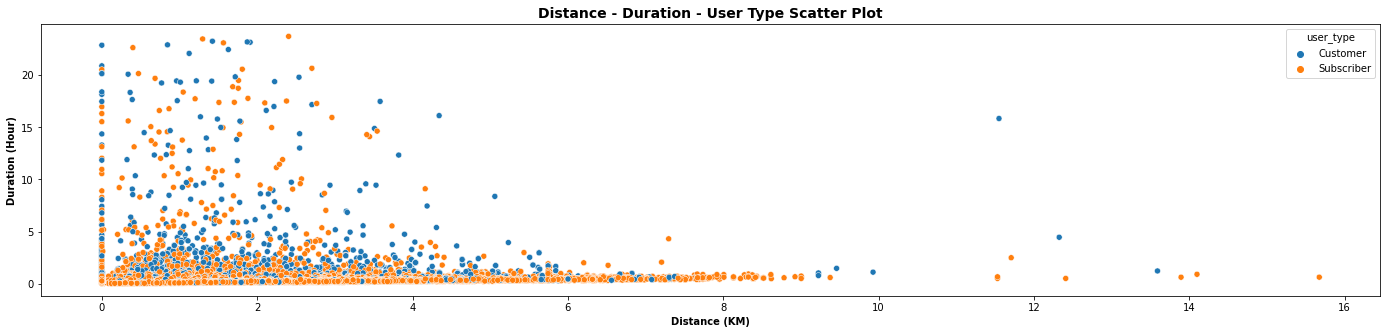

In [63]:
plt.figure(figsize = [24, 5])
sns.scatterplot(data=df_clean,x='distance_km',y="duration_hr",hue='user_type');
plt.title("Distance - Duration - User Type Scatter Plot",fontsize = 14, weight = "bold");
# Add x label and format it
plt.xlabel("Distance (KM)",fontsize = 10, weight = "bold");
# Add y label and format it
plt.ylabel("Duration (Hour)",
               fontsize = 10, weight = "bold");

There are no obvious patterns; the subscribers are capable to travelling a long distance faster (within a short time) yet we can see points that indicates that they can also take longer time to travel a short distance. We can argue that customers are less likely to embark on long distance rides. 

### Some of the relationships observed in this part of the investigation

No new obvious relationships were observed

## Conclusions

We analyzed Ford GoBike data set which includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in February 2019. Majority of the riders are men from the 18-39years followed 40-60years and most of them were not just members but subscribers.


Trips occurred more from Tuesday to Friday with Thursday as the highest and Sunday the lowest while the busiest hours are 7am - 9am and 4pm - 7pm. Bearing in mind that the majority of the users are within the age of 18-39 and 40-60 which could be called the working/business class, one could argue that the busiest hours are actually the time they should be going to work/ventures (7am - 9am) and when they should be returning home (4pm - 7pm).


The first Week, 4 - 10 (first Monday - Sunday) did better than the second week (11-17). We can argue that there was a drawback in the second week making the week 1 high the resistance level. The resistance was broken on the third week (18-24) making it the new resistance level till it got broken on Thursday 28 feb.  Generally, our chart started making higher lows and relatively higher highs as from feb 9, which denotes an uptrend. Thus, the business made progress in the month of feb, 2019.


The energetics and subscribers are more likely to embark on long-distance rides. On average all age group travels almost the same distance though the tendency to travel more distance decreases as age increases. Contrary to the initial weak correlation observed between distancce_km and duration_hr, reshape the them under time series reveals that they are actually positively correlated. 


(Market St at 10th St) generated the highest start trip while (San Francisco Caltrain Station 2 (Townsend St at 4th St)) generated the highest end trip. One might at first be tempted to conclude that (Market St at 10th St) - (San Francisco Caltrain Station 2 (Townsend St at 4th St)) would be the most travelled route but that's wrong though it made it to top eleven. The most travelled route from our dataset is (Berry St at 4th St) - (San Francisco Ferry Building (Harry Bridges Plaza)). What makes it more interesting is that (Berry St at 4th St) is the third highest start strip station while (San Francisco Ferry Building (Harry Bridges Plaza)) is the fourth highest end trip station.


The missing data we had in birth_year and gender came  from stations with high demands. Thus, we can argue that the omissions might be due to rush to attend to high demands

Majority of the rides travelled alone. Customers and those with missing birth_year and gender travelled alone the most.



## Limitations

* We discovered 10 most used bikes but we weren't able to know why those bikes were preferred by users. The dataset did not provide bike features.
* There was no information about the user's identity which made it impossible to know the real number of users that moves in and out of stations. It is very possible for a user especially a subscriber to embark in more than one ride. 